In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import *
from utils.model_utils import *
from utils.train_utils import *
from utils.metrics import *
from utils.visualization import *

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 16
learning_rate = 0.0003
num_classes = 2
model_name = "efficientnet_b0"
output_dir = "outputs/models/augmented"
os.makedirs(output_dir, exist_ok=True)


In [5]:
print("[INFO] Loading augmented datasets...")
train_loader, val_loader, test_loader = load_datasets(
    data_dir=data_dir, batch_size=batch_size, augmentation="augmented"
)
print("[INFO] Augmented datasets loaded successfully!")

2024-12-21 16:19:10,634 - INFO - Loading datasets from wildfire_dataset_scaled with augmentation type 'augmented'.
2024-12-21 16:19:10,635 - INFO - Applying advanced augmentations: Flip, Rotate, Noise, and more.
c:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\pydantic\main.py:214: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)
2024-12-21 16:19:10,669 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/train
2024-12-21 16:19:10,673 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/val
2024-12-21 16:19:10,676 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/test
2024-12-21 16:19:10,676 - INFO - Datasets initialized. Preparing DataLoaders...
2024-12-21 16:19:10,677 - INFO - Using WeightedRandomSampler for class balanc

[INFO] Loading augmented datasets...


2024-12-21 16:19:27,632 - INFO - DataLoaders created successfully.


[INFO] Augmented datasets loaded successfully!


In [6]:
# Initialize the model
print(f"\n[INFO] Starting Training for Model: {model_name} with Augmented Data\n")
print(f"[INFO] Initializing {model_name} model...")
model = initialize_model(
    model_name=model_name,
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline augmentation: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Training for Model: efficientnet_b0 with Augmented Data

[INFO] Initializing efficientnet_b0 model...
[INFO] Model initialized successfully!


In [7]:
# Define loss function and optimizer
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
# Train the model
from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

print("[INFO] Starting model training with augmented data...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,  # No LR scheduler for augmented baseline
    device=device,
    save_path=os.path.join(output_dir, f"{model_name}_augmented.pt"),
    early_stop_patience=12,  # Early stopping patience
    monitor_metric="val_f1"
)
print("[INFO] Training completed successfully!")

[INFO] Starting model training with augmented data...

Starting training...



[INFO] Learning rate adjusted to: 0.000300
[INFO] Best model saved with val_f1: 0.6234
Epoch [1]: Train Loss: 0.6834, Train Acc: 0.5548 | Val Loss: 0.6392, Val Acc: 0.6244, Val Recall: 0.5081, Val F1: 0.6234


[INFO] Learning rate adjusted to: 0.000300
[INFO] Best model saved with val_f1: 0.7689
Epoch [2]: Train Loss: 0.6221, Train Acc: 0.6465 | Val Loss: 0.5757, Val Acc: 0.7264, Val Recall: 0.7439, Val F1: 0.7689


[INFO] Learning rate adjusted to: 0.000300
[INFO] Best model saved with val_f1: 0.7891
Epoch [3]: Train Loss: 0.5853, Train Acc: 0.6948 | Val Loss: 0.5393, Val Acc: 0.7488, Val Recall: 0.7683, Val F1: 0.7891


[INFO] Learning rate adjusted to: 0.000300
[INFO] No improvement in val_f1. Patience: 1/12
Epoch [4]: Train Loss: 0.5736, Train Acc: 0.7128 | Val Loss: 0.5258, Val Acc: 0.7438, Val Recall: 0.7764, Val F1: 0.7876


[INFO] Learning rate adjusted to: 0.000150
[INFO] Best model saved with val_f1: 0.8027
Epoch [5]: Train Loss: 0.5549, Train Acc: 0.7091 | Val Loss: 0.5039, Val Acc: 0.7786, Val Recall: 0.7358, Val F1: 0.8027


[INFO] Learning rate adjusted to: 0.000150
[INFO] No improvement in val_f1. Patience: 1/12
Epoch [6]: Train Loss: 0.5766, Train Acc: 0.6937 | Val Loss: 0.5100, Val Acc: 0.7388, Val Recall: 0.8089, Val F1: 0.7913


[INFO] Learning rate adjusted to: 0.000150
[INFO] No improvement in val_f1. Patience: 2/12
Epoch [7]: Train Loss: 0.5794, Train Acc: 0.6826 | Val Loss: 0.5215, Val Acc: 0.7438, Val Recall: 0.7561, Val F1: 0.7832


[INFO] Learning rate adjusted to: 0.000150
[INFO] Best model saved with val_f1: 0.8170
Epoch [8]: Train Loss: 0.5556, Train Acc: 0.7085 | Val Loss: 0.4971, Val Acc: 0.7861, Val Recall: 0.7805, Val F1: 0.8170


[INFO] Learning rate adjusted to: 0.000150
[INFO] No improvement in val_f1. Patience: 1/12
Epoch [9]: Train Loss: 0.5445, Train Acc: 0.7144 | Val Loss: 0.5185, Val Acc: 0.7612, Val Recall: 0.7683, Val F1: 0.7975


[INFO] Learning rate adjusted to: 0.000075
[INFO] No improvement in val_f1. Patience: 2/12
Epoch [10]: Train Loss: 0.5308, Train Acc: 0.7207 | Val Loss: 0.5200, Val Acc: 0.7264, Val Recall: 0.7602, Val F1: 0.7727


[INFO] Learning rate adjusted to: 0.000075
[INFO] No improvement in val_f1. Patience: 3/12
Epoch [11]: Train Loss: 0.5548, Train Acc: 0.7001 | Val Loss: 0.5082, Val Acc: 0.7562, Val Recall: 0.8089, Val F1: 0.8024


[INFO] Learning rate adjusted to: 0.000075
[INFO] No improvement in val_f1. Patience: 4/12
Epoch [12]: Train Loss: 0.5425, Train Acc: 0.7133 | Val Loss: 0.4880, Val Acc: 0.7537, Val Recall: 0.7886, Val F1: 0.7967


[INFO] Learning rate adjusted to: 0.000075
[INFO] No improvement in val_f1. Patience: 5/12
Epoch [13]: Train Loss: 0.5393, Train Acc: 0.7218 | Val Loss: 0.4892, Val Acc: 0.7662, Val Recall: 0.8049, Val F1: 0.8082


[INFO] Learning rate adjusted to: 0.000075
[INFO] No improvement in val_f1. Patience: 6/12
Epoch [14]: Train Loss: 0.5559, Train Acc: 0.7107 | Val Loss: 0.5166, Val Acc: 0.7313, Val Recall: 0.7967, Val F1: 0.7840


[INFO] Learning rate adjusted to: 0.000037
[INFO] No improvement in val_f1. Patience: 7/12
Epoch [15]: Train Loss: 0.5402, Train Acc: 0.7260 | Val Loss: 0.4907, Val Acc: 0.7413, Val Recall: 0.7967, Val F1: 0.7903


[INFO] Learning rate adjusted to: 0.000037
[INFO] No improvement in val_f1. Patience: 8/12
Epoch [16]: Train Loss: 0.5232, Train Acc: 0.7308 | Val Loss: 0.5179, Val Acc: 0.7289, Val Recall: 0.7642, Val F1: 0.7753


[INFO] Learning rate adjusted to: 0.000037
[INFO] No improvement in val_f1. Patience: 9/12
Epoch [17]: Train Loss: 0.5347, Train Acc: 0.7228 | Val Loss: 0.5274, Val Acc: 0.7214, Val Recall: 0.7642, Val F1: 0.7705


[INFO] Learning rate adjusted to: 0.000037
[INFO] No improvement in val_f1. Patience: 10/12
Epoch [18]: Train Loss: 0.5449, Train Acc: 0.7048 | Val Loss: 0.5009, Val Acc: 0.7413, Val Recall: 0.7439, Val F1: 0.7787


[INFO] Learning rate adjusted to: 0.000037
[INFO] No improvement in val_f1. Patience: 11/12
Epoch [19]: Train Loss: 0.5433, Train Acc: 0.7292 | Val Loss: 0.5233, Val Acc: 0.7388, Val Recall: 0.7439, Val F1: 0.7771


[INFO] Learning rate adjusted to: 0.000019
[INFO] Best model saved with val_f1: 0.8225
Epoch [20]: Train Loss: 0.5401, Train Acc: 0.7234 | Val Loss: 0.4688, Val Acc: 0.7886, Val Recall: 0.8008, Val F1: 0.8225


[INFO] Learning rate adjusted to: 0.000019
[INFO] No improvement in val_f1. Patience: 1/12
Epoch [21]: Train Loss: 0.5123, Train Acc: 0.7318 | Val Loss: 0.4962, Val Acc: 0.7388, Val Recall: 0.7642, Val F1: 0.7817


[INFO] Learning rate adjusted to: 0.000019
[INFO] No improvement in val_f1. Patience: 2/12
Epoch [22]: Train Loss: 0.5541, Train Acc: 0.7059 | Val Loss: 0.4936, Val Acc: 0.7562, Val Recall: 0.8049, Val F1: 0.8016


[INFO] Learning rate adjusted to: 0.000019
[INFO] No improvement in val_f1. Patience: 3/12
Epoch [23]: Train Loss: 0.5440, Train Acc: 0.7228 | Val Loss: 0.5273, Val Acc: 0.7413, Val Recall: 0.7439, Val F1: 0.7787


[INFO] Learning rate adjusted to: 0.000019
[INFO] No improvement in val_f1. Patience: 4/12
Epoch [24]: Train Loss: 0.5125, Train Acc: 0.7472 | Val Loss: 0.5106, Val Acc: 0.7512, Val Recall: 0.8333, Val F1: 0.8039


[INFO] Learning rate adjusted to: 0.000009
[INFO] No improvement in val_f1. Patience: 5/12
Epoch [25]: Train Loss: 0.5432, Train Acc: 0.7128 | Val Loss: 0.5137, Val Acc: 0.7438, Val Recall: 0.7439, Val F1: 0.7804


[INFO] Learning rate adjusted to: 0.000009
[INFO] No improvement in val_f1. Patience: 6/12
Epoch [26]: Train Loss: 0.5274, Train Acc: 0.7409 | Val Loss: 0.5152, Val Acc: 0.7463, Val Recall: 0.7520, Val F1: 0.7839


[INFO] Learning rate adjusted to: 0.000009
[INFO] No improvement in val_f1. Patience: 7/12
Epoch [27]: Train Loss: 0.5259, Train Acc: 0.7350 | Val Loss: 0.4825, Val Acc: 0.7662, Val Recall: 0.7886, Val F1: 0.8050


[INFO] Learning rate adjusted to: 0.000009
[INFO] No improvement in val_f1. Patience: 8/12
Epoch [28]: Train Loss: 0.5296, Train Acc: 0.7292 | Val Loss: 0.4927, Val Acc: 0.7786, Val Recall: 0.8171, Val F1: 0.8187


[INFO] Learning rate adjusted to: 0.000009
[INFO] No improvement in val_f1. Patience: 9/12
Epoch [29]: Train Loss: 0.5278, Train Acc: 0.7202 | Val Loss: 0.5025, Val Acc: 0.7537, Val Recall: 0.7480, Val F1: 0.7880


[INFO] Learning rate adjusted to: 0.000005
[INFO] No improvement in val_f1. Patience: 10/12
Epoch [30]: Train Loss: 0.5571, Train Acc: 0.6926 | Val Loss: 0.4793, Val Acc: 0.7687, Val Recall: 0.7805, Val F1: 0.8050


[INFO] Learning rate adjusted to: 0.000005
[INFO] No improvement in val_f1. Patience: 11/12
Epoch [31]: Train Loss: 0.5341, Train Acc: 0.7271 | Val Loss: 0.5091, Val Acc: 0.7488, Val Recall: 0.7683, Val F1: 0.7891


[INFO] Learning rate adjusted to: 0.000005
[INFO] No improvement in val_f1. Patience: 12/12
Epoch [32]: Train Loss: 0.5435, Train Acc: 0.7160 | Val Loss: 0.4992, Val Acc: 0.7736, Val Recall: 0.7846, Val F1: 0.8092
[INFO] Training stopped after 32 epochs. Best val_f1: 0.8225

[INFO] Training completed successfully!


In [9]:
# Evaluate the model
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device
)
print(f"\n[INFO] Metrics for {model_name} with Augmented Data:\n{metrics}")

[INFO] Evaluating the model...
[INFO] Evaluation metrics saved to outputs/logs\model\model_evaluation.json

[INFO] Metrics for efficientnet_b0 with Augmented Data:
{'classification_report': {'No Fire': {'precision': 0.7454545454545455, 'recall': 0.7735849056603774, 'f1-score': 0.7592592592592593, 'support': 159.0}, 'Fire': {'precision': 0.8530612244897959, 'recall': 0.8326693227091634, 'f1-score': 0.842741935483871, 'support': 251.0}, 'accuracy': 0.8097560975609757, 'macro avg': {'precision': 0.7992578849721708, 'recall': 0.8031271141847705, 'f1-score': 0.8010005973715651, 'support': 410.0}, 'weighted avg': {'precision': 0.8113308294492965, 'recall': 0.8097560975609757, 'f1-score': 0.8103669464113997, 'support': 410.0}}, 'confusion_matrix': [[123, 36], [42, 209]], 'roc_auc': np.float64(0.8768949359793531)}


[INFO] Saving training and evaluation results...
[INFO] Training plot saved to outputs/models/augmented\efficientnet_b0_augmented_training_curve.png
[INFO] Confusion matrix saved to outputs/models/augmented\efficientnet_b0_augmented_confusion_matrix.png


KeyError: 'y_true'

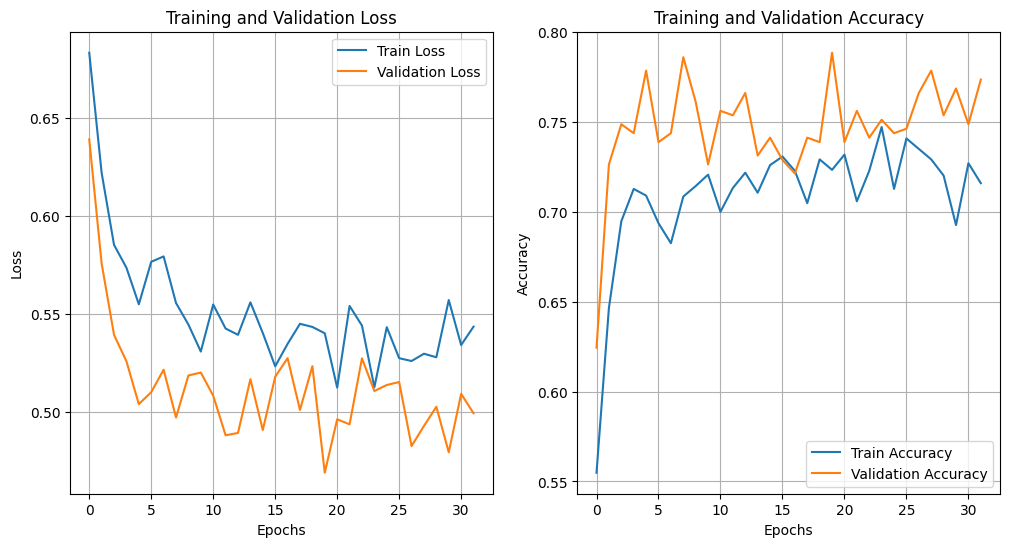

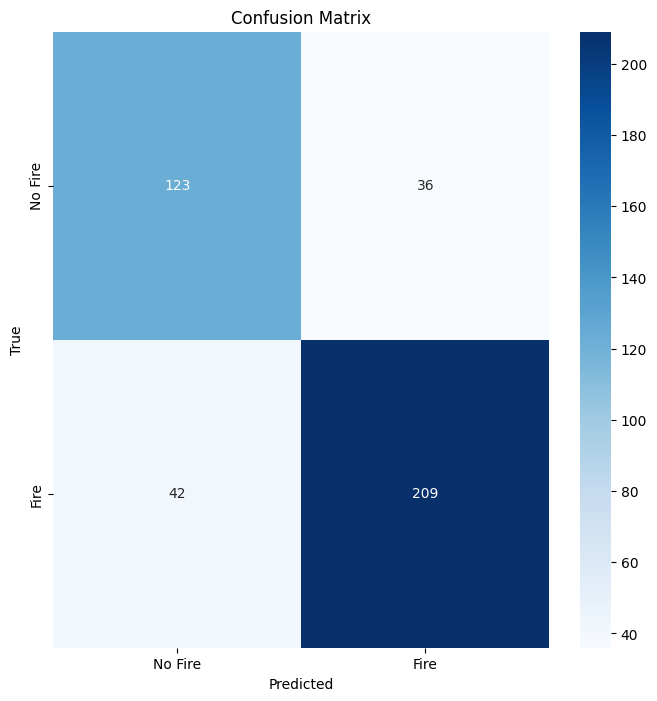

In [10]:
print("[INFO] Saving training and evaluation results...")

# Training curve
plot_training(
    history, output_path=os.path.join(output_dir, f"{model_name}_augmented_training_curve.png")
)

# Confusion matrix
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path=os.path.join(output_dir, f"{model_name}_augmented_confusion_matrix.png")
)

# ROC Curve
plot_roc_curve(
    y_true=metrics["y_true"],
    y_scores=metrics["y_scores"],
    output_path=os.path.join(output_dir, f"{model_name}_augmented_roc_curve.png")
)

# Precision-Recall Curve
plot_precision_recall(
    y_true=metrics["y_true"],
    y_scores=metrics["y_scores"],
    output_path=os.path.join(output_dir, f"{model_name}_augmented_precision_recall.png")
)

print("[INFO] All results saved successfully!")